### Gender-Career Implicit Association Test Data, 2005-2020

#### Imports & Reading in .sav Files

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import glob
import seaborn as sns

In [4]:
%%time

df_lst = []
files = glob.glob("data/gender_career_data/Gender*.sav")

for f in files:
    data = pd.read_spss(f)
    df_lst.append(data)

all_data = pd.concat(df_lst)    


CPU times: user 1min 22s, sys: 22.2 s, total: 1min 44s
Wall time: 1min 46s


In [5]:
all_data.count()

session_id        3159286
session_status    3159286
study_name        3159286
date              3159286
month             3159286
                   ...   
sius008             30789
sius009             30778
sius010             30772
sius011             30777
sius012             30762
Length: 192, dtype: int64

In [6]:
pct_completion = 1627738 / 3159286
pct_completion

0.515223376421128

#### Removing Irrelevant columns / indexes

In [7]:
all_data[all_data['session_status'] == 'C'].count()

session_id        1627738
session_status    1627738
study_name        1627738
date              1627738
month             1627738
                   ...   
sius008             23089
sius009             23081
sius010             23082
sius011             23086
sius012             23074
Length: 192, dtype: int64

In [8]:
to_drop = ['assocareer', 'assofamily', 'impcareer', 'impfamily', 'num_childunder18', 'actualduties', 'idealduties', 'primary1', 'num_primary1a', 'secondary1', 'num_secondary1a', 'surnameused', 'iatevaluations001', 'iatevaluations002', 'iatevaluations003', 'broughtwebsite', 'user_id', 'previous_session_id', 'previous_session_schema', 'havechildren', 'numboys', 'numgirls', 'planchildren', 'childunder18', 'primary1a', 'primary1aa', 'secondary1a', 'secondary1aa', 'q2a',
 'q2b',
 'q2c',
 'q2d',
 'q3a',
 'q3b',
 'q3c',
 'q4', 'politicalid_6',
 'femaleceos',
 'femalepres',
 'femalepres_2006',
 'religion',
 'femalepres_2007', 'hillary.hillary1',
 'hillary.hillary2',
 'hillary.hillary3',
 'hillary.hillary4',
 'hillary.hillary5',
 'hillary.hillary6',
 'hillary.hillary7',
 'hillary.hillary8',
 'hillary.hillary9',
 'hillary.hillary10',
 'hillarycomp',
 'hillarytherm',
 'hillaryvote',
 'deathanxiety001',
 'deathanxiety002',
 'deathanxiety003',
 'deathanxiety004',
 'deathanxiety005',
 'deathanxiety006',
 'deathanxiety007',
 'deathanxiety008',
 'deathanxiety009',
 'deathanxiety010',
 'deathanxiety011',
 'deathanxiety012',
 'deathanxiety013',
 'deathanxiety014',
 'deathanxiety015',
 'fearcovid001',
 'fearcovid002',
 'fearcovid003',
 'fearcovid004',
 'fearcovid005',
 'fearcovid006',
 'fearcovid007',
 'fearcovid008',
 'pvd001',
 'pvd002',
 'pvd003',
 'pvd004',
 'pvd005',
 'pvd006',
 'pvd007',
 'pvd008',
 'pvd009',
 'pvd010',
 'pvd011',
 'pvd012',
 'pvd013',
 'pvd014',
 'pvd015',
 'sius001',
 'sius002',
 'sius003',
 'sius004',
 'sius005',
 'sius006',
 'sius007',
 'sius008',
 'sius009',
 'sius010',
 'sius011',
 'sius012', 'religion2009', 'religion2014']

In [9]:
all_data.drop(to_drop, inplace=True, axis=1)


In [10]:
completed_tests = all_data[all_data['session_status']=='C']

##### Combining Multiple Education columns

In [11]:
completed_tests.loc[:, 'edu_14'].fillna(completed_tests.edu_13, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [12]:
completed_tests.loc[:, 'edu_14'].replace(['M.B.A.'],'other advanced degree')


0                         NaN
2                         NaN
4                some college
9           bachelor's degree
11            master's degree
                 ...         
92155         master's degree
92156       bachelor's degree
92158       bachelor's degree
92159    some graduate school
92163                     NaN
Name: edu_14, Length: 1627738, dtype: object

In [13]:
completed_tests.drop(labels='edu_13', inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
completed_tests.year.value_counts()

2020.0    259267
2019.0    192586
2018.0    183444
2017.0    172266
2016.0    145261
2015.0    112271
2013.0     71819
2014.0     71604
2012.0     67749
2009.0     55598
2011.0     55051
2006.0     54665
2010.0     53105
2007.0     47474
2008.0     47015
2005.0     38563
Name: year, dtype: int64

In [15]:
completed_tests.rename(columns={'edu_14': 'edu_13'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
completed_tests.edu.value_counts()

 5.0      357062
 7.0      320972
 9.0      185302
 4.0      115276
 3.0      110160
 8.0       99727
 6.0       99003
 14.0      53405
 12.0      50777
 10.0      27845
 11.0      17892
-999.0     16694
 2.0       14592
 13.0      12239
 1.0        2924
Name: edu, dtype: int64

In [17]:
comp_tests = completed_tests.copy()
comp_tests.drop('edu', inplace=True, axis=1)

In [18]:
comp_tests.edu_13.value_counts()

some college             357062
bachelor's degree        320972
master's degree          185302
high school graduate     115276
some high school         110160
some graduate school      99727
associate's degree        99003
M.B.A.                    53405
Ph.D.                     50777
J.D.                      27845
M.D.                      17892
-999.0                    16694
junior high               14592
other advanced degree     12239
elementary school          2924
Name: edu_13, dtype: int64

Remove participants with high rates of error (more than 30%) or with too many fast trials (more than 10%)

IF  (pct_300<=10 & PCT_error_3467<=30)Error='No'.
IF  (pct_300>10 OR PCT_error_3467>30) Error='Yes'.

In [19]:
comp_tests.drop(comp_tests.index[comp_tests['pct_300'] >10], inplace=True)

In [20]:
comp_tests.pct_300.count()

1481954

In [21]:
comp_tests.drop(comp_tests.index[comp_tests['PCT_error_3467'] >30], inplace=True)

In [22]:
comp_tests.PCT_error_3467.count()

1442692

In [23]:
comp_tests.rename(columns={'D_biep.Male_Career_all': 'Implicit'}, inplace=True)

In [24]:
comp_tests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 83 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   session_id             1468590 non-null  float64 
 1   session_status         1468590 non-null  object  
 2   study_name             1468590 non-null  object  
 3   date                   1468590 non-null  float64 
 4   month                  1468590 non-null  float64 
 5   day                    1468590 non-null  float64 
 6   year                   1468590 non-null  float64 
 7   hour                   1468590 non-null  float64 
 8   weekday                1468590 non-null  float64 
 9   birthmonth             781589 non-null   float64 
 10  birthyear              759174 non-null   float64 
 11  num_002                784439 non-null   object  
 12  birthSex               561349 non-null   float64 
 13  genderIdentity         588084 non-null   object  
 14  ethn

In [25]:
comp_tests.num_002.value_counts()

0      432100
1      196332
2       80040
3-5     59851
6+      16116
Name: num_002, dtype: int64

In [26]:
more_drops = ['birthmonth', 
              'num_002', 
              'N_3467',
              'Order', 
              'Side_Career_34', 
              'Side_Male_34', 
              'pct_300', 
              'pct_400', 
              'pct_2K', 
              'pct_3K', 
              'pct_4K', 
              'Mn_RT_all_3', 
              'Mn_RT_all_4', 
              'Mn_RT_all_6', 
              'Mn_RT_all_7', 
              'SD_all_3', 
              'SD_all_4', 
              'SD_all_6', 
              'SD_all_7', 
              'N_3', 
              'N_4', 
              'N_6', 
              'N_7', 
              'Mn_RT_correct_3', 
              'Mn_RT_correct_4', 
              'Mn_RT_correct_6', 
              'Mn_RT_correct_7', 
              'SD_correct_3', 
              'SD_correct_4', 
              'SD_correct_6', 
              'SD_correct_7', 
              'N_ERROR_3', 
              'N_ERROR_4', 
              'N_ERROR_6', 
              'N_ERROR_7', 
              'occuSelfDetail', 
              'major', 'occuSelf', 'occuself', 'occuselfdetail']

In [27]:
comp_less = comp_tests.copy()

In [28]:
comp_less.drop(more_drops, axis=1, inplace=True)

In [29]:
comp_less.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 43 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   session_id             1468590 non-null  float64
 1   session_status         1468590 non-null  object 
 2   study_name             1468590 non-null  object 
 3   date                   1468590 non-null  float64
 4   month                  1468590 non-null  float64
 5   day                    1468590 non-null  float64
 6   year                   1468590 non-null  float64
 7   hour                   1468590 non-null  float64
 8   weekday                1468590 non-null  float64
 9   birthyear              759174 non-null   float64
 10  birthSex               561349 non-null   float64
 11  genderIdentity         588084 non-null   object 
 12  ethnicityomb           1238710 non-null  object 
 13  raceomb_002            720451 non-null   object 
 14  raceombmulti        

In [30]:
comp_less.birthSex.value_counts()

2.0    381566
1.0    179783
Name: birthSex, dtype: int64

In [31]:
comp_less.birthsex.value_counts()

2.0    154172
1.0     78416
Name: birthsex, dtype: int64

In [32]:
comp_less.loc[:, ('birthSex')]

0        1.0
2        2.0
4        1.0
9        1.0
11       1.0
        ... 
92154    NaN
92156    NaN
92158    NaN
92159    NaN
92163    NaN
Name: birthSex, Length: 1468590, dtype: float64

Combining multiple birthsex & sex identity columns

In [33]:
comp_less.loc[:, 'birthSex'].fillna(comp_less.birthsex, inplace=True)

In [34]:
comp_less.birthSex.value_counts()

2.0    535738
1.0    258199
Name: birthSex, dtype: int64

In [35]:
comp_less.drop(columns='birthsex', axis=1, inplace=True)

In [36]:
comp_less.loc[:, 'genderIdentity'].fillna(comp_less.genderidentity, inplace=True)

In [37]:
comp_less.drop(columns='ethnic', axis=1, inplace=True)

In [38]:
comp_less.drop(columns='raceombmulti', axis=1, inplace=True)

In [39]:
comp_less.drop(columns=['D_biep.Male_Career_36', 'D_biep.Male_Career_47', 'N_5'], axis=1, inplace=True)

In [40]:
comp_less.drop(columns=['politicalid'], axis=1, inplace=True)

In [41]:
comp_less.loc[:, 'raceomb'].fillna(comp_less.raceomb_002, inplace=True)

In [42]:
# Race categories: combine Multiracial, more than 1 race - other, and more than 1 race - black / white when doing race

In [43]:
comp_less.replace(to_replace=['More than one race - Other', 'More than one race - Black/White'], value='Multiracial', inplace=True)

In [44]:
comp_less.replace(to_replace='Other or unknown', value='Other or Unknown', inplace=True)

In [45]:
comp_less.raceomb.value_counts()

White                                        903387
Black or African American                     80273
Multiracial                                   63933
East Asian                                    59950
Other or Unknown                              59667
South Asian                                   52831
American Indian/Alaska Native                  7240
Native Hawaiian or other Pacific Islander      6809
Name: raceomb, dtype: int64

In [46]:
comp_less.drop(columns=['raceomb_002'], axis=1, inplace=True)

In [47]:
comp_less.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 35 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   session_id      1468590 non-null  float64
 1   session_status  1468590 non-null  object 
 2   study_name      1468590 non-null  object 
 3   date            1468590 non-null  float64
 4   month           1468590 non-null  float64
 5   day             1468590 non-null  float64
 6   year            1468590 non-null  float64
 7   hour            1468590 non-null  float64
 8   weekday         1468590 non-null  float64
 9   birthyear       759174 non-null   float64
 10  birthSex        793937 non-null   float64
 11  genderIdentity  879322 non-null   object 
 12  ethnicityomb    1238710 non-null  object 
 13  Implicit        1442690 non-null  float64
 14  Mn_RT_all_3467  1442692 non-null  float64
 15  PCT_error_3467  1442692 non-null  float64
 16  anninc          1178019 non-null  obje

In [55]:
comp_less.loc[:, 'genderIdentity'].fillna(comp_less.genderidentity, inplace=True)

In [56]:
comp_less.drop(columns='genderidentity', axis=1, inplace=True)

In [57]:
comp_less.to_csv("total_gender_career_BP.csv")


In [65]:
comp_less[['year']] = comp_less[['year']].astype(int)

In [153]:
comp_less.birthSex.value_counts()

2.0    535738
1.0    258199
Name: birthSex, dtype: int64

In [158]:
comp_less['birthSex'] = comp_less['birthSex'].replace({1.0: 'Male', 2.0: 'Female'})

In [74]:
comp_less['genderIdentity'].replace(to_replace='.', value='NaN')

0        [1]
2        [2]
4        [1]
9        [1]
11       [1]
        ... 
92154    NaN
92156    NaN
92158    NaN
92159    NaN
92163    NaN
Name: genderIdentity, Length: 1468590, dtype: object

''

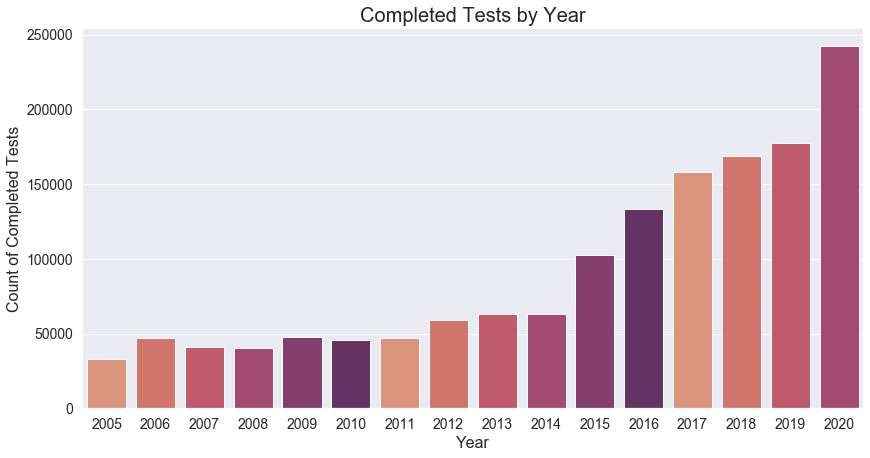

In [166]:
plt.figure(figsize=(14,7))

ax = sns.countplot(x= 'year', data=comp_less, palette=sns.color_palette('flare'))
ax.set_title('Completed Tests by Year',fontsize=20)
ax.set_ylabel('Count of Completed Tests', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

;

''

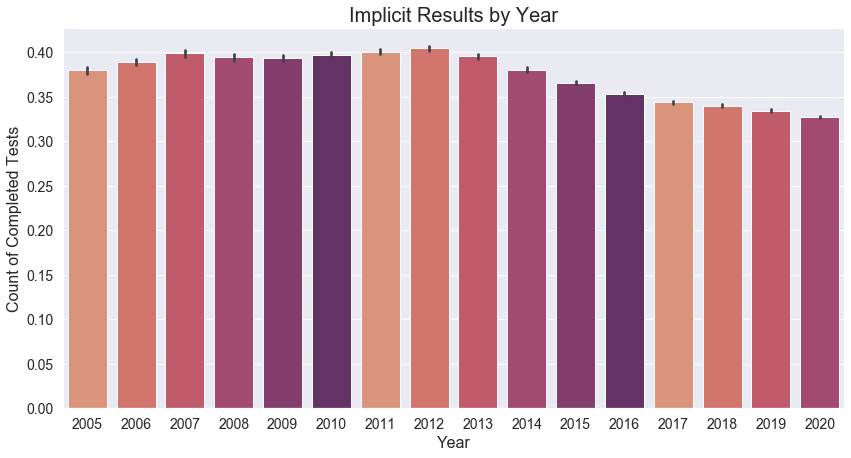

In [164]:
plt.figure(figsize=(14,7))

ax = sns.barplot(x= 'year', y="Implicit", data=comp_less, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Year',fontsize=20)
ax.set_ylabel('Count of Completed Tests', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

;

In [172]:
comp_less.countryres.value_counts()

US     461666
.       72302
1       61231
UK      18441
CA      17469
        ...  
12          1
189         1
BV          1
161         1
9           1
Name: countryres, Length: 400, dtype: int64

''

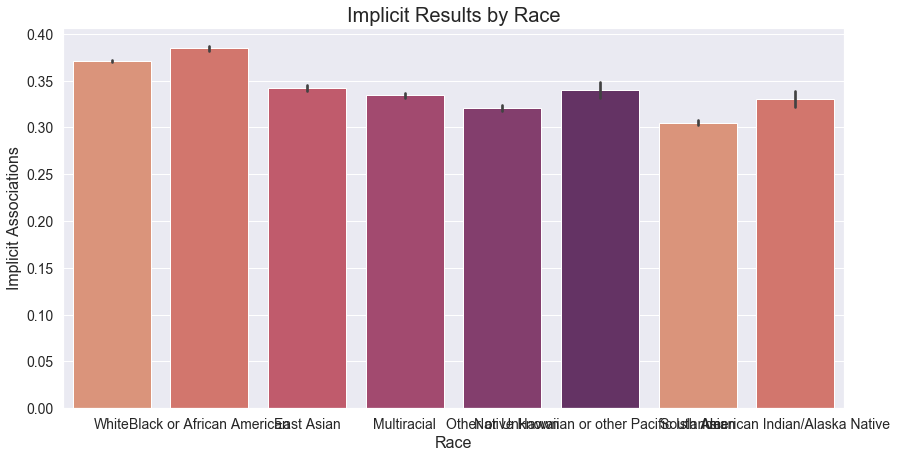

In [173]:
plt.figure(figsize=(14,7))

ax = sns.barplot(x= 'raceomb', y= 'Implicit', data=comp_less, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Race',fontsize=20)
ax.set_ylabel('Implicit Associations', fontsize=16)
ax.set_xlabel('Race', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

;

In [177]:
comp_less.loc[:, 'countryres'].fillna(comp_less.countryres_num, inplace=True)

In [178]:
comp_less.countryres.value_counts()

U.S.A.            529269
US                461666
.                  72302
1                  61231
United Kingdom     35662
                   ...  
87                     1
128                    1
YT                     1
144                    1
NF                     1
Name: countryres, Length: 629, dtype: int64

In [182]:
comp_less.replace(to_replace='U.S.A.', value='US', inplace=True)

In [183]:
comp_less.countryres.value_counts()

US                990935
.                  72302
1                  61231
United Kingdom     35662
Canada             19798
                   ...  
131                    1
128                    1
79                     1
123                    1
TK                     1
Name: countryres, Length: 628, dtype: int64

In [184]:
comp_us = comp_less[comp_less.countryres == 'US']

In [274]:
comp_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990935 entries, 4 to 92158
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   session_id      990935 non-null  float64
 1   session_status  990935 non-null  object 
 2   study_name      990935 non-null  object 
 3   date            990935 non-null  float64
 4   month           990935 non-null  float64
 5   day             990935 non-null  float64
 6   year            990935 non-null  int64  
 7   hour            990935 non-null  float64
 8   weekday         990935 non-null  float64
 9   birthSex        989646 non-null  object 
 10  genderIdentity  562092 non-null  object 
 11  ethnicityomb    906465 non-null  object 
 12  Implicit        977401 non-null  float64
 13  Mn_RT_all_3467  977401 non-null  float64
 14  PCT_error_3467  977401 non-null  float64
 15  anninc          857126 non-null  object 
 16  percentanninc   879091 non-null  object 
 17  edu_13     

In [186]:
comp_us.drop(['countryres_num', 'countrycit_num'], inplace=True, axis=1)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [187]:
comp_us.to_csv("comp_us.csv")

In [188]:
comp_us['age2'] = comp_us['year'] - comp_us['birthyear']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
comp_us.loc[:, 'age'].fillna(comp_us.age2, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [192]:
comp_us.age.count()

971397

In [194]:
comp_us.to_csv("comp_us.csv")

In [195]:
comp_us.drop('birthyear', axis=1, inplace=True)

In [199]:
comp_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990935 entries, 4 to 92158
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   session_id      990935 non-null  float64
 1   session_status  990935 non-null  object 
 2   study_name      990935 non-null  object 
 3   date            990935 non-null  float64
 4   month           990935 non-null  float64
 5   day             990935 non-null  float64
 6   year            990935 non-null  int64  
 7   hour            990935 non-null  float64
 8   weekday         990935 non-null  float64
 9   birthSex        989646 non-null  object 
 10  genderIdentity  562092 non-null  object 
 11  ethnicityomb    906465 non-null  object 
 12  Implicit        977401 non-null  float64
 13  Mn_RT_all_3467  977401 non-null  float64
 14  PCT_error_3467  977401 non-null  float64
 15  anninc          857126 non-null  object 
 16  percentanninc   879091 non-null  object 
 17  edu_13     

In [198]:
comp_us.loc[:, 'birthSex'].fillna(comp_us.sex, inplace=True)

In [200]:
comp_us.drop('sex', axis=1, inplace=True)

In [201]:
comp_us.birthSex.value_counts()

Female    697903
Male      288628
.           2733
             382
Name: birthSex, dtype: int64

In [202]:
comp_us.to_csv("comp_us.csv")

''

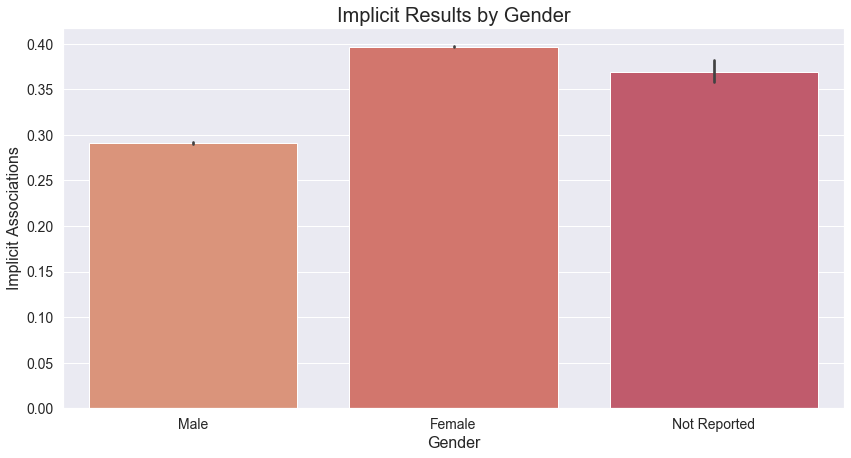

In [216]:
plt.figure(figsize=(14,7))

ax = sns.barplot(x= 'birthSex', y= 'Implicit', data=comp_us, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Gender',fontsize=20)
ax.set_ylabel('Implicit Associations', fontsize=16)
ax.set_xlabel('Gender', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

;

In [211]:
comp_us.birthSex.replace(to_replace=['.', ''], value='Not Reported', inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [231]:
yeardf = comp_us[['year', 'birthSex', 'Implicit']].copy()
yeardf = yeardf[yeardf.birthSex != 'Not Reported']

''

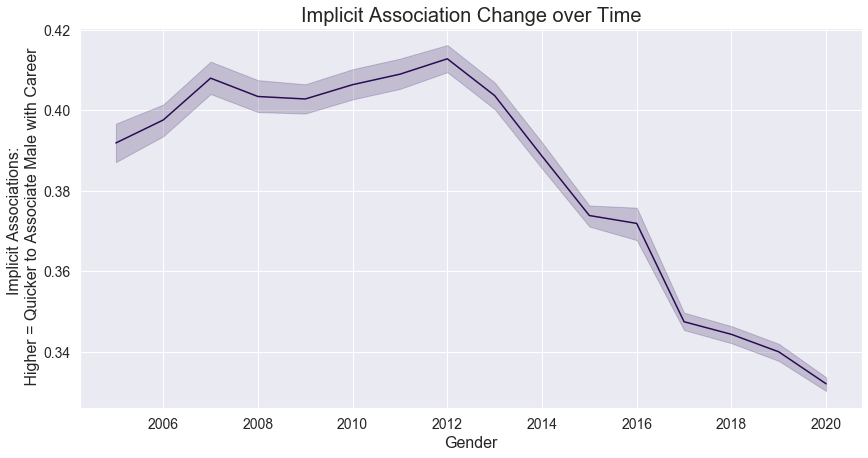

In [234]:
plt.figure(figsize=(14,7))

ax = sns.lineplot(x= 'year', y= 'Implicit', data=yeardf, palette='summer')
ax.set_title('Implicit Association Change over Time',fontsize=20)
ax.set_ylabel('Implicit Associations: \n Higher = Quicker to Associate Male with Career', fontsize=16)
ax.set_xlabel('Gender', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

;

In [235]:
yeardf.birthSex.value_counts()

Female    697903
Male      288628
Name: birthSex, dtype: int64

''

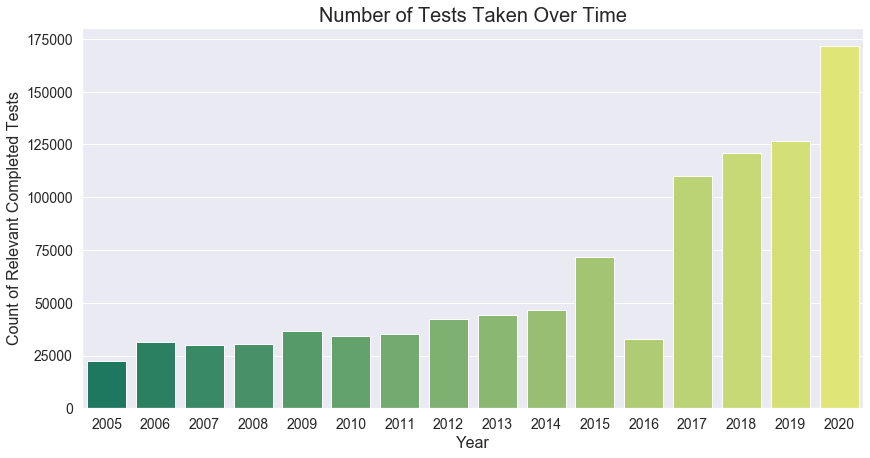

In [238]:
plt.figure(figsize=(14,7))

ax = sns.countplot(x= 'year', data=yeardf, palette='summer')
ax.set_title('Number of Tests Taken Over Time',fontsize=20)
ax.set_ylabel('Count of Relevant Completed Tests', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

;

#Take gradient off, should all be same color 

In [239]:
yeardf.count()

year        987820
birthSex    986531
Implicit    974390
dtype: int64

In [240]:
yeardf.year.value_counts()

2020    171665
2019    126410
2018    121042
2017    110152
2015     71769
2014     46502
2013     44266
2012     42451
2009     36541
2011     35368
2010     34328
2016     32767
2006     31640
2008     30687
2007     29967
2005     22265
Name: year, dtype: int64

In [275]:
comp_us['year'].value_counts(normalize=True) * 100


2020    17.323538
2019    12.756639
2018    12.214928
2017    11.115966
2015     7.303506
2014     4.762169
2013     4.510891
2012     4.304218
2009     3.705288
2011     3.584493
2010     3.480148
2016     3.312326
2006     3.211714
2008     3.114634
2007     3.034407
2005     2.265133
Name: year, dtype: float64

In [276]:
all_data['year'].value_counts(normalize=True) * 100

2020.0    14.900170
2019.0    11.434229
2018.0    10.970295
2017.0    10.598028
2016.0     9.838362
2015.0     8.259240
2014.0     4.649848
2013.0     4.349812
2012.0     4.150653
2009.0     3.443025
2011.0     3.347623
2010.0     3.211865
2007.0     3.054203
2006.0     2.963866
2008.0     2.917241
2005.0     1.911540
Name: year, dtype: float64

In [252]:
comp_us.count()

session_id        990935
session_status    990935
study_name        990935
date              990935
month             990935
day               990935
year              990935
hour              990935
weekday           990935
birthSex          989646
genderIdentity    562092
ethnicityomb      906465
Implicit          977401
Mn_RT_all_3467    977401
PCT_error_3467    977401
anninc            857126
percentanninc     879091
edu_13            980639
politicalid_7     923613
STATE             990935
MSANo             990935
CountyNo          990935
MSAName           990935
religionid        839458
age               971397
num               461666
countrycit        461666
countryres        990935
raceomb           901674
occupation        439220
age2              513042
dtype: int64

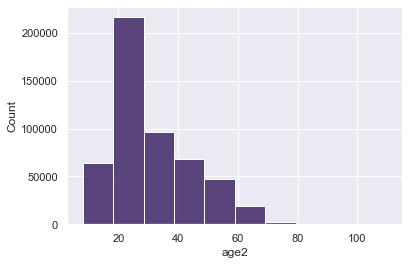

In [265]:
fig, ax = plt.subplots()

# vis1 = sns.histplot(comp_us["politicalid_7"], ax= ax[0][0])
# vis2 = sns.histplot(comp_us["Implicit"], bins=10)
vis3 = sns.histplot(comp_us["age2"], bins=10)
# 

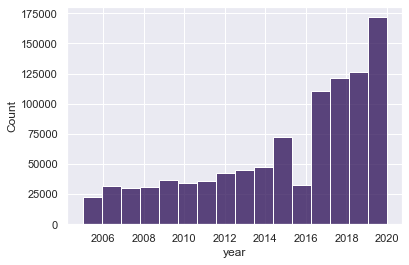

In [277]:
vis4 = sns.histplot(comp_us["year"], bins=16);

What happened to odd years? And 2016!! 

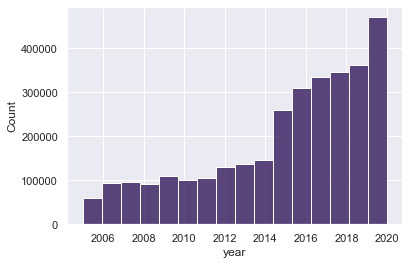

In [272]:
vis4 = sns.histplot(all_data["year"], bins=16);